[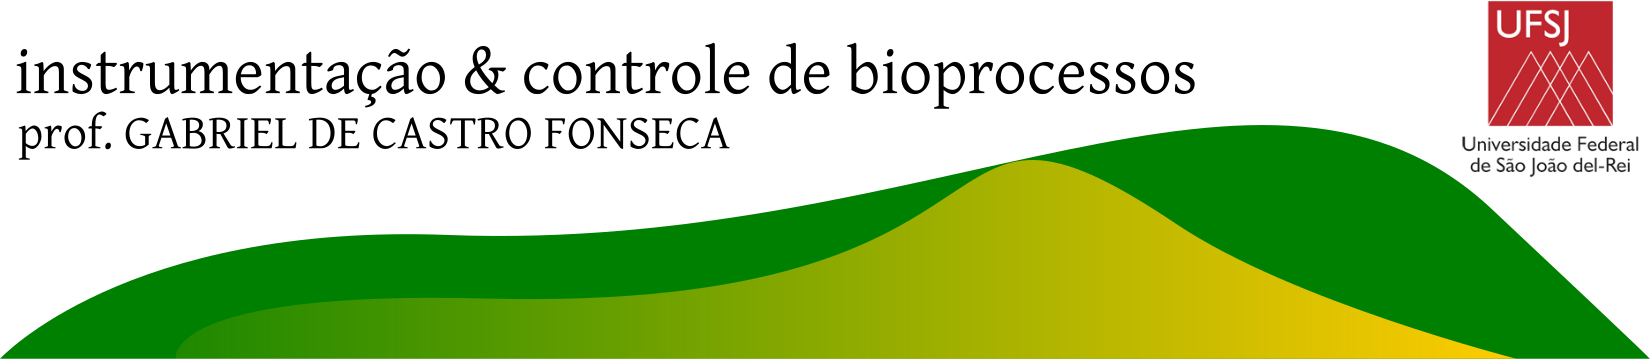](Aulas-Sumário.ipynb)

# Sistemas Especiais

*Prof. Gabriel de Castro Fonseca (DQBIO/UFSJ)*<br>
*Instrumentação e Controle de Bioprocessos*

Este documento é publicado sob os termos da licença [GNU General Public Licence 3.0](https://www.gnu.org/licenses/gpl-3.0.en.html).

## Avanço-atraso

Em Controle de Processos fala-se em dois tipos de atraso: o **atraso de transferência**, que é a demora para um sistema capacitivo atingir a resposta permanente e o **atraso de transporte**, também chamado de tempo morto, que estudaremos mais adiante.

O atraso de transferência tem relação com a solução homogênea, isto é, a solução transiente de uma EDO linear. Como vimos [há algumas aulas](ordem_superior.ipynb), a solução homogênea está relacionada ao polinômio característico, que é o *denominador* da função de transferência associada ao sistema.

Se o atraso de transferência tem relação com o denominador da função de transferência, a parte da função de transferência que tem relação com o *numerador* é chamada de **avanço**. Considere, por exemplo, um sistema com a seguinte função de transferência:

$$
    \frac{y(t)}{u(t)} = \frac{K(\tau_n s + 1)}{\tau s + 1}
$$

Reconstruindo a equação diferencial que resulta nessa função de transferência teríamos

\begin{gather*}
    (\tau s + 1)y(t) = K(\tau_n s + 1)u(t)\\
    \tau \frac{dy}{dt} + y = K\tau_n \frac{du}{dt} + Ku
\end{gather*}

Este tipo de sistema é chamado de **avanço-atraso** (em inglês *lead-lag*) ou sistema com **dinâmica de numerador**. A resposta do sistema depende não apenas do estímulo, mas também da derivada do estímulo. O parâmetro $\tau_n$ é a constante de tempo do numerador, isto é, do avanço.

Observe que a ordem diferencial do avanço não pode ser maior que a do atraso: o atraso representa a reação do sistema ao estímulo e o avanço representa a reação do estímulo à resposta do sistema. Por uma questão de causa e efeito, o estímulo não pode reagir à resposta mais do que a resposta reage ao estímulo.

Considere um sistema avanço-atraso de primeira ordem sob efeito de um estímulo degrau, $ u(t) = a\mathbf{1}^+(t) $. A resposta dinâmica do processo pode ser calculada como:

\begin{gather*}
    	\tau \frac{dy}{dt} + y = aK\left(\tau_n \frac{d}{dt}\mathbf{1}^+(t)+\mathbf{1}^+(t)\right) \\
		\tau \dot y + y = aK[\tau_n\delta(t)+\mathbf{1}^+(t)]
\end{gather*}

Como vimos em [uma aula passada](primeira_ordem2), a derivada da função degrau é o impulso e além disso, a resposta de um sistema a dois estímulos diferentes é igual à soma das respostas a cada estímulo individual. Assim sendo,

$$
            y(t) = \tau_n \underbrace{\frac{aK}{\tau}e^{-t / \tau}}_{\text{impulso}} + \underbrace{aK\left(1-e^{- t / \tau}\right)}_{\text{degrau}}
$$

\begin{equation}
		y(t) = aK\left[1-e^{-t / \tau}\left(1-\frac{\tau_n}{\tau}\right)\right]
\end{equation}

Abaixo o código plota as respostas de sistemas avanço-atraso de primeira ordem (capacitivo) e de segunda ordem (criticamente amortecido) a um degrau para diferentes valores da razão $\dfrac{\tau_n}\tau$.

In [1]:
%matplotlib inline

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import ipywidgets as widgets

def avançoatraso1(t,τn):
    """
    Sistema avanço atraso de primeira ordem.
    """
    return np.where(t < 0, 0, 1 - np.exp(-t )*( 1 - τn ) )

def segundaordem(y,t,ζ):
    """
    Sistema de segunda ordem.
    """
    y, dy = y[0], y[1]
    d2y = -2*ζ*dy - y + 1 
    return dy, d2y

def avançoatraso2(t,ζ,τn):
    """
    Sistema avanço-atraso de segunda ordem
    """
    y = odeint(segundaordem, [0,0] , t, args=(ζ,))
    return y[:,0] + τn*y[:,1] # o array y[:,1] tem as derivadas de y[:,0], ou seja, resp. ao impulso
    
def principal(τn,ζ):
    t  = np.linspace(-1,1,51)
    t  = np.append(t,np.linspace(1,12,51))
    x = avançoatraso1(t,τn)
    y = avançoatraso1(t,0)
    plt.rcParams["figure.figsize"]=[15,6]
    plt.rcParams.update({'font.size': 14})
    plt.subplot(121)
    plt.title(r"$\dfrac{y(t)}{u(t)} = \dfrac{K(\tau_n s + 1)}{\tau s + 1}$"+"\n")
    graf(t,x,y,τn)
    plt.subplot(122)
    x = avançoatraso2(t,ζ,τn)
    y = avançoatraso2(t,ζ,0)
    plt.title(r"$\dfrac{y(t)}{u(t)} = \dfrac{K(\tau_n s + 1)}{\tau^2 s^2 + 2\zeta\tau s + 1}$"+"\n")
    graf(t,x,y,τn)
    
    
def graf(t,x,y,τn):
    plt.plot(t,x,label=r"$\tau_n/\tau$ = "+f"{τn:4.2f}")
    plt.plot(t,y, color = "gray", linestyle = "--")
    plt.ylabel(r"Resposta, $\dfrac{y(t)}{aK}$")
    plt.xlabel(r"Tempo, $\dfrac{t}{\tau}$")
    plt.legend()
    plt.grid()

τn_widget = widgets.FloatSlider(min=-1.0, max=3.0, step=0.2, value=0, description = r'$\tau_n/\tau$')
ζ_widget = widgets.FloatSlider(min=0.5, max=1.5, step=0.5, value=1, description = r'$\zeta$')

w = widgets.interact(principal, τn=τn_widget, ζ=ζ_widget)
w.widget.children[-1].layout.height = '500px' 
display(w)

interactive(children=(FloatSlider(value=0.0, description='$\\tau_n/\\tau$', max=3.0, min=-1.0, step=0.2), Floa…

<function __main__.principal(τn, ζ)>

#### Caso 1: $\quad \tau_n = 0$

Se a constante de tempo do avanço for nula, recaímos no caso dos sistemas sem avanço, que estudamos nas últimas aulas.

#### Caso 2: $\quad 0 < \dfrac{\tau_n}\tau < 1 $

Se a razão entre as constantes de tempo do avanço e do atraso for um número entre zero e um, observa-se um avanço na resposta, isto é, o regime permanente é atingida mais rapidamente graças à parcela impulsional da resposta ao degrau. No sistema de primeira ordem essa contribuição é muito visível, fazendo a resposta saltar para um ponto de partida em $\frac{aK\tau_n}\tau$.

#### Caso 3: $\quad \dfrac{\tau_n}\tau = 1$

Algo muito interessante ocorre quando $\tau_n = \tau$: No sistema de primeira ordem a resposta ao degrau se torna outro degrau. No sistema de segunda ordem criticamente amortecido a resposta ao degrau se torna de primeira ordem. Esses comportamentos são consequência do cancelamento de termos do numerador e do denominador.

No sistema capacitivo com avanço:

\begin{gather*}
    \tau \dot y + y = K(\tau_n \dot u + u) \\
    (\tau s + 1) y = K(\tau s + 1) u \\
    y = Ku
\end{gather*}

No sistema de segunda ordem criticamente amortecido:

\begin{gather*}
    \tau^2 \ddot y + 2 \tau \dot y + y = K(\tau_n \dot u + u) \\
    (\tau s + 1)^2 y = K(\tau s + 1) u \\
    \tau \dot y + y = K u
\end{gather*}

#### Caso 4: $\quad \dfrac{\tau_n}\tau > 1$

Para $\tau_n > \tau$ o sistema de primeira ordem e o criticamente amortecido apresentam *overshoots*. No sistema subamortecido o *overshoot* cresce juntamente com $\tau_n$. No superamortecido o *overshoot* existe, mas é preciso que a razão $\frac{\tau_n}\tau$ supere um valor finito superior a um.

#### Caso 5: $\quad \dfrac{\tau_n}\tau < 0$

Quando $\tau_n$ é um número negativo, o sistema tem características de **resposta inversa**, ou seja, a resposta inicialmente evolui na direção contrária à resposta permanente. Este tipo de resposta acontece quando um mesmo estímulo causa efeitos opostos em um sistema. 

Um exemplo seria uma fermentação exotérmica em batelada alimentada onde a corrente de mosto está a uma temperatura $T_0$ menor que a temperatura do biorreator. Se a cinética da reação for lenta, um aumento na vazão de mosto inicialmente faria a temperatura do reator diminuir, devido ao influxo de corrente fria. Entretanto, o aumento na quantidade de substrato no meio causaria um aumento na taxa de reação, elevando a temperatura.

### Modelos com avanço-atraso

Conforme sugerido na explicação sobre a resposta inversa, sistemas avanço-atraso surgem quando há dois ou mais processos com dinâmicas diferentes que relacionam um estímulo a uma saída. Por exemplo,

\begin{gather*}
    y(t) = \left( \frac{K_1}{\tau_1s+1} + \frac{K_2}{\tau_2s+1} \right) u(t) \\
    y(t) = \frac{K_1(\tau_2s+1) + K_2(\tau_1s + 1)}{(\tau_1s+1)(\tau_2s+1)} u(t) \\
    y(t) = \frac{(K_1\tau_2 + K_2\tau_1)s + (K_1 + K_2)}{(\tau_1s+1)(\tau_2s+1) u(t)} \\
    y(t) = \frac{K(\lambda s + 1)}{\tau^2 s^2 + 2\zeta \tau s + 1} u(t)
\end{gather*}

Onde:
* $K = K_1 + K_2$
* $\tau_n = \dfrac{K_1\tau_2 + K_2\tau_1}{K_1+K_2}$
* $\tau = \sqrt{\tau_1\tau_2}$

[Como estudamos anteriormente](ordem_superior.ipynb), as raízes do polinômio no denominador da função de transferência são chamadas de raízes características ou polos e têm relação com a solução homogênea do sistema. As raízes do polinômio no numerador são chamadas de zeros elas também têm influência na dinâmica da resposta. Cada zero com parte real positiva na função de transferência introduz uma mudança de direção na solução (resposta inversa). Neste caso, o zero da função de transferência é $-\frac{1}{\tau_n}$. A condição para que o zero seja positivo é que $\tau_n<0$, ou seja, $K_1\tau_2 < -K_2\tau_1$ e $K_1+K_2 > 0$.

Esse sistema pode ser representado no Xcos em forma de diagrama de blocos como

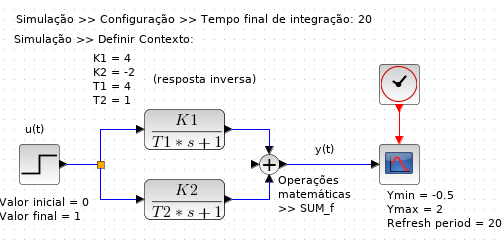

A escolha dos parâmetros conforme mostrados na figura resulta em um sistema com resposta inversa.

Respostas inversas são difíceis de controlar, pois ao tentar compensar o desvio da variável resposta quando ela caminha na direção inversa, o controlador pode intensificar o desvio quando a variável volta para a direção da resposta permanente. Assim como polos positivos, que indicam instabilidade, os zeros positivos geralmente são más notícias para o controle do processo.

## Tempo morto

Na figura abaixo uma corrente material é pré-aquecida em um trocador de calor antes de ser alimentada a um tanque agitado. Entre o trocador de calor e o tanque há um tubo longo que pode ser considerado adiabático.

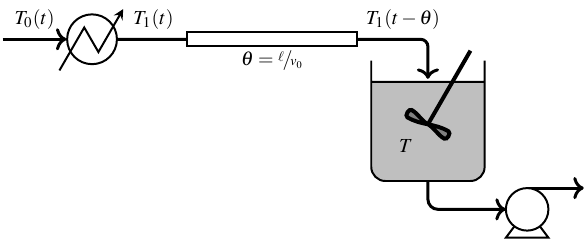

Se a temperatura do fluido que deixa o trocador de calor variar, essa mudança só será observada na entrada do tanque alguns momentos depois, devido ao tempo de transporte do fluido aquecido através do tubo. Esse intervalo de tempo é conhecido no jargão do Controle de Processos como **tempo morto** ou **atraso de transporte**.

Se $\theta$ é o tempo necessário para o fluido a velocidade $v$ escoar pela extensão do tubo de comprimento $\ell$, pode-se dizer que as temperaturas na entrada e na saída do tubo valem respectivamente $T_1(t)$ e $T_1(t-\theta)$, ou seja, a temperatura na saída do tubo é igual a como a era a temperatura na entrada $\theta$ unidades de tempo atrás.

O balanço de energia no tanque sem reação pode ser representado como

\begin{gather*}
    \rho V c_p\frac{dT}{dt} = \rho F c_p(T_1-T)  \\
    \frac{V}{F}\frac{dT}{dt} + T = T_1(t-\theta) \\
    \tau \frac{dy}{dt} + y = K u(t-\theta)
\end{gather*}

Trata-se de um sistema capacitivo com estímulo deslocado no tempo. Mostramos [há algumas aulas](primeira_odem2.ipynb) que a solução para problemas desse tipo nada mais é do que uma translação da solução sem tempo morto. Para um degrau na concentração de reagente,

\begin{equation}
    y(t) = aK\left[ 1 - e^{-(t-\theta)/\tau} \right] \mathbf{1}^+(t-\theta)
\end{equation}

### Função de transferência do tempo morto

Seja $ u(x) $ uma função qualquer, sua expansão em série de Taylor em torno do ponto $ x_0 $ é dada por

$$
    u(x) = u(x_0) + \left.\frac{du}{dx}\right)_{x_0}(x-x_0) + \frac{1}{2}\left.\frac{d^2u}{dx^2}\right)_{x_0}(x-x_0)^2+\cdots
$$

Façamos $ x = t-\theta$ e $ x_0 = t $. Nesse caso, $ x-x_0 = -\theta $ e $ d x = d t $. Assim,

$$
    u(t-\theta) = u(t) + \frac{du}{dt}\cdot (-\theta) + \frac{1}{2}\frac{d^2u}{dt^2}\cdot (-\theta)^2+\cdots
$$

Substituindo $ s \equiv \frac{d}{dt} $,

\begin{gather*}
    u(t-\theta) = u(t)\cdot\left(1-s\theta + \frac{s\theta^2}{2!} - \frac{s\theta^3}{3!} + \cdots \right) \\[2mm]
    u(t-\theta) = u(t) \cdot e^{-s\theta}
\end{gather*}

A função de transferência entre a saída e a entrada de um processo de tempo morto puro é, portanto,

\begin{equation}
    \frac{u(t-\theta)}{u(t)} = e^{-s\theta}
\end{equation}

Esse resultado faz sentido. Se emendarmos dois tubos longos em série (ou dividirmos um único tubo longo em dois pedaços), o tempo morto do conjunto será igual à soma dos tempos mortos de cada parte. Essa propriedade é observada ao se multiplicar duas exponenciais.

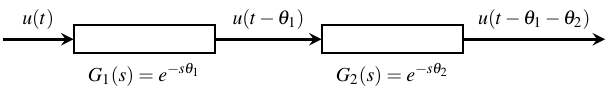

\begin{gather*}
    \frac{u(t-\theta_1)}{u(t)} = e^{-s\theta_1} \\
    \frac{u(t-\theta_1-\theta_2)}{u(t-\theta_1)} = e^{-s\theta_2} \\
    \frac{u(t-\theta_1-\theta_2)}{u(t)} = \frac{u(t-\theta_1-\theta_2)}{u(t-\theta_1)} \cdot \frac{u(t-\theta_1)}{u(t)} \\
    \frac{u(t-\theta_1-\theta_2)}{u(t)} = e^{-s\theta_1} \cdot e^{-s\theta_2} = e^{-s(\theta_1+\theta_2)}
\end{gather*}

Essa propriedade pode ser confirmada no Xcos com o seguinte diagrama de blocos:

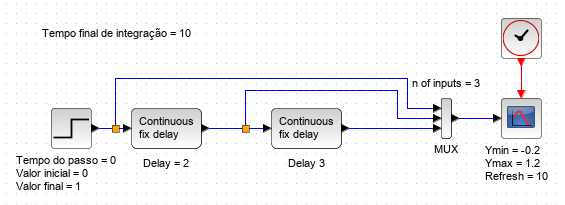

Tempos mortos podem estar associados a sistemas dinâmicos. Um tanque conectado a um tubo longo, por exemplo, pode ser modelado como um sistema capacitivo com tempo morto. A função de transferência do conjunto seria

\begin{gather*}
    \tau \frac{dy}{dt} + y = K u(t-\theta) \\
    \tau \frac{dy}{dt} + y = K u(t)e^{-s\theta} \\
    \frac{y(t)}{u(t)} = \frac{Ke^{-s\theta}}{\tau s + 1}
\end{gather*}

### Aproximação de Padé

É possível caracterizar o comportamento dinâmico de um sistema pela análise dos seus zeros e polos, isto é, as raízes dos polinômios localizados respectivamente no numerador e no denominador da função de transferência. A introdução de um termo exponencial no numerador dificulta essa análise, entretanto.

Embora *softwares* numéricos lidem bem com sistemas lineares com tempos mortos, algumas técnicas de projeto de controladores requerem a substituição do termo exponencial por alguma aproximação polinomial.

A aproximação mais óbvia seria a série de Maclaurin: $ e^{-x} = 1 - x + \frac{x^2}2 - \frac{x^3}{3!} + \cdots $, o que truncando no primeiro termo ficaria $e^{-s\theta} \approx 1 - s\theta $.

\begin{equation}
    \frac{y(t)}{u(t)} \approx \frac{K(1-s\theta)}{\tau s + 1}
\end{equation}

Essa aproximação introduz um zero positivo na função de transferência (resposta inversa) sem alterar a ordem do sistema (isto é, a ordem do polinômio característico). 

Uma aproximação um pouco mais satisfatória é obtida substituindo-se o termo exponencial por uma razão entre dois polinômios de mesma ordem:

\begin{equation}
    e^{-s\theta} \approx \frac{e^{-s\theta/2}}{e^{s\theta/2}} = \frac{1-\frac{s\theta}{2}}{1+\frac{s\theta}{2}} = \frac{2-s\theta}{2+s\theta}
\end{equation}
\begin{equation}
    \frac{y(t)}{u(t)} \approx \frac{K(2-s\theta)}{(\tau s + 1)(2+s\theta)}
\end{equation}

Essa substituição é conhecida como **aproximação de Padé** de 1ª ordem. A aproximação 2ª ordem também é comum e consiste de

\begin{equation}
    e^{-s\theta} \approx \frac{s^2\theta^2 - 6 s\theta + 12}{s^2\theta^2 + 6 s\theta + 12}
\end{equation}

As aproximações de Padé introduzem dinâmica de avanço-atraso, aumentando a ordem do sistema. A aproximação de 2ª ordem introduz dois zeros com parte real positiva, o que implica em uma resposta com duas mudanças de direção.

O código abaixo compara a resposta de um sistema capacitivo com tempo morto ao degrau às respostas obtidas usando a aproximação polinomial e as aproximações de Padé.

In [7]:
%matplotlib inline

def capacitivo_tm(t,θ):
    return np.where( t > θ, 1 - np.exp(-t+θ), 0 )

def padé1(y,t,θ):
    y, dy = y
    d2y = -(2+θ)/θ * dy - 2/θ * y + 1
    return dy, d2y

def padé2(y,t,θ):
    y, dy, d2y = y
    d3y = -(1+6/θ)*d2y -(6/θ+12/θ**2)*dy - 12/θ**2 * y + 1
    return dy, d2y, d3y

def principal(aprox,θ):
    t = np.linspace(0,10,201)
    x = capacitivo_tm(t,θ)
    if aprox == "Polinômio de 1ª ordem":
        y = avançoatraso1(t,-θ)
    elif aprox == "Padé de 1ª ordem":
        z = odeint(padé1,[0,0],t,args=(θ,))
        y = 2*z[:,0]/θ-z[:,1]
    else:
        z = odeint(padé2,[0,0,0],t,args=(θ,))
        y = 12/θ**2 * z[:,0] - 6/θ*z[:,1] + z[:,2]
    plt.rcParams["figure.figsize"]=[6,4]
    plt.rcParams.update({'font.size': 14})
    plt.plot(t,x, label="Original")
    plt.plot(t,y, label="Aproximado")
    plt.ylabel(r"Resposta, $\dfrac{y(t)}{aK}$")
    plt.xlabel(r"Tempo, $\dfrac{t}{\tau}$")
    plt.title("Sistema capacitivo com tempo morto")
    plt.legend()
    plt.grid()

aprox_widget = widgets.Dropdown(options = ["Polinômio de 1ª ordem", "Padé de 1ª ordem", "Padé de 2ª ordem"], 
                                value = "Polinômio de 1ª ordem", description = "Aproximação")
θ_widget = widgets.FloatSlider(min=0.2, max=2.0, step=0.2, value=0, description = r'$\theta$')

w = widgets.interact(principal, aprox = aprox_widget, θ=θ_widget)
w.widget.children[-1].layout.height = '500px' 
display(w)

interactive(children=(Dropdown(description='Aproximação', options=('Polinômio de 1ª ordem', 'Padé de 1ª ordem'…

<function __main__.principal(aprox, θ)>

## Modelos empíricos

Quando não sabemos modelar um sistema ou o esforço necessário para a modelagem é maior que o para fazer um experimento pode ser interessante conceber um modelo empírico.

Modelos empíricos se baseiam na aplicação de um estímulo degrau de magnitude conhecida sobre um processo industrial em andamento e na medição dos valores da variável resposta ao longo do tempo. 

Como o experimento costuma ser realiado durante o processo industrial, é preciso tomar cuidado com a magnitude do degrau aplicado: um degrau muito pequeno pode não ser suficiente para medir a resposta com precisão, mas um degrau muito grande pode tirar o processo das especificações, resultando em perdas financeiras ao realizar o experimento.

O gráfico obtido com a resposta ao degrau é chamado de **curva de reação**. Com base na forma da curva de reação escolhe-se um modelo simples com três ou quatro parâmetros que possa ser bem ajustado aos dados experimentais.

Considere, por exemplo, um experimento onde os seguintes pontos tenham sido obtidos após a aplicação de um degrau unitário ($a=1$) a um processo em uma planta industrial:

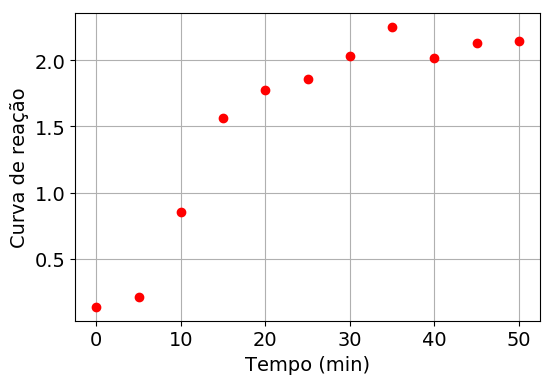

In [3]:
import numpy as np
import matplotlib.pyplot as plt

t = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
y = [ 0.137, 0.214, 0.856, 1.561, 1.774, 1.858, 2.036, 2.254, 2.015, 2.132, 2.147]

plt.rcdefaults() # estilo padrão do gráfico
plt.rcParams.update({'font.size': 14})
plt.rcParams["figure.figsize"] = [6,4]
plt.plot(t,y,'ro')
plt.xlabel("Tempo (min)")
plt.ylabel("Curva de reação")
plt.grid()

Suponha que escolhemos modelar esse sistema assumindo uma dinâmica de primeira ordem com tempo morto, ou seja, um modelo com a seguinte função de transferência:

$$
    \frac{y(t)}{u(t)} = \frac{Ke^{-s\theta}}{\tau s + 1}
$$

Os três parâmetros necessários para ajustar o modelo empírico seriam $\theta$, $K$ e $\tau$. Há duas formas de estimá-los:

1. Método gráfico
2. Regressão não linear

O método gráfico consiste em desenhar uma curva que passe entre os pontos experimentais e estimar

* a constante $\theta$ a partir do ponto de partida da curva de reação;
* a constante $K$ a partir da resposta permanente;
* a constante $\tau$ a partir do tempo necessário para atingir 63,2% da resposta permanente.

	Ajuste gráfico:


/home/gabriel/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


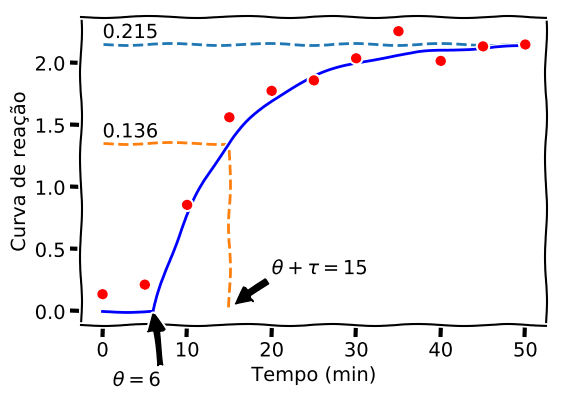

In [4]:
plt.xkcd() # estilo "desenhando a mão"
plt.xlabel("Tempo (min)")
plt.ylabel("Curva de reação")

θ, K, τ = 6, 2.15, 9
T = np.linspace(0,50,101)
Y = np.where ( T >= θ , K*( 1 - np.exp( -(T-θ)/τ ) ), 0 )
plt.plot([0,50],[K,K], linestyle = 'dashed')
plt.plot([0,θ+τ,θ+τ],[0.632*K, 0.632*K, 0], linestyle = 'dashed')
plt.plot(T,Y,'b-')
plt.plot(t,y,'ro')


plt.annotate(r'$\theta = 6$', xy=(6, 0), xytext=(1.2, -0.6),
            arrowprops=dict(facecolor='black', shrink=0.05) )

plt.annotate(r'$\theta + τ = 15$', xy=(15.5, 0.05), xytext=(20, 0.3),
            arrowprops=dict(facecolor='black', shrink=0.05) )

plt.text(0,1.4,"$0.136$")
plt.text(0,2.2,"$0.215$")
print("\tAjuste gráfico:")

O método por regressão não linear se baseia na otimização dos parâmetros $\theta$, $K$ e $\tau$ de forma a minimizar a diferença entre a curva de regressão e os pontos experimentais.

O código abaixo ajusta os pontos à curva:

$$
y(t) = aK\left[ 1 - e^{-(t-\theta)/\tau} \right] \mathbf{1}^+(t-\theta)
$$

	Ajuste por regressão linear:


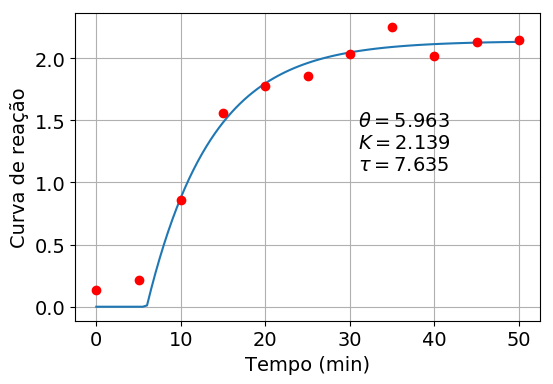

In [5]:
from scipy.optimize import curve_fit

def modelo(t,θ,K,τ):
    t = np.array(t) # t inicialmente é uma lista
    return np.where( t >= θ, K*( 1 - np.exp( -(t-θ)/τ ) ), 0 )

par, covar = curve_fit(modelo,t,y) # parâmetros ajustados e covariância
z = modelo(T,par[0],par[1],par[2])

plt.rcdefaults() # estilo padrão do gráfico
plt.rcParams["figure.figsize"] = [6,4]
plt.rcParams.update({'font.size': 14})
plt.plot(T, z, t, y,'ro')
plt.xlabel("Tempo (min)")
plt.ylabel("Curva de reação")
plt.grid()
plt.text(31,1.1,f"$\\theta={par[0]:5.3f}$\n$K ={par[1]:5.3f}$\n$\\tau={par[2]:5.3f}$")
print("\tAjuste por regressão linear:")

## Bibliografia

* C.A. Kluever (2018). Sistemas Dinâmicos: Modelagem, Simulação e Controle. LTC. Capítulo 7.
* B.W. Bequette. (2003). Process Control: Modeling, Design and Simulation. PHI Learning. Capítulos 3 e 4.
* C. Garcia (2017). Controle de Processos Industriais: Estratégias Convencionais. Volume 1, Blucher. Capítulo 3.
* C.A. Smith, A. Corripio (2008). Princípios e Prática do Controle Automático de Processo. 3 a ed. LTC. Capítulo 4.
* J.C. Kantor (2019). [CBE 30338 Chemical Process Control](http://jckantor.github.io/CBE30338/). Capítulo 3.